<a href="https://colab.research.google.com/github/GIT-gmp/Titanic_Survival_Rate/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Shape: (891, 12)

Data Types and Nulls:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Null values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fa

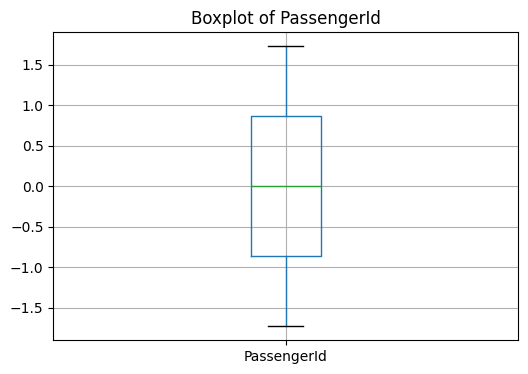

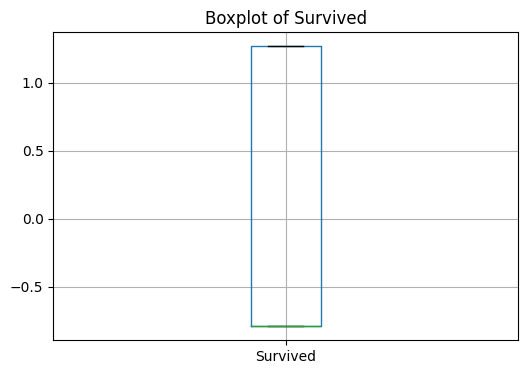

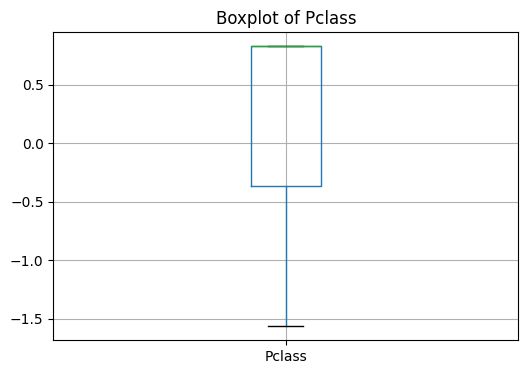

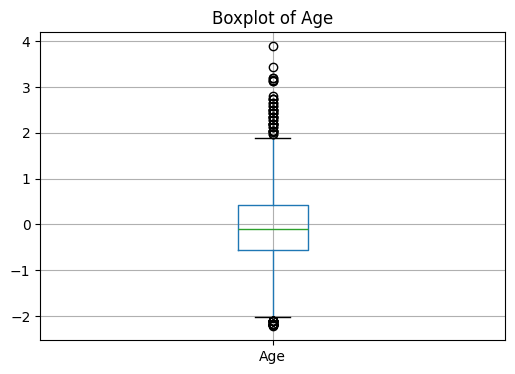

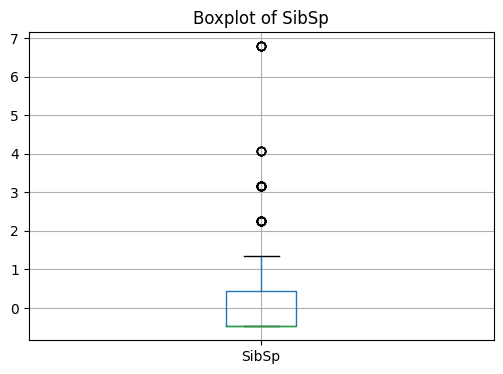

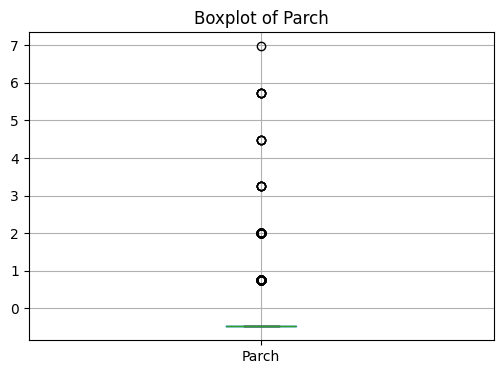

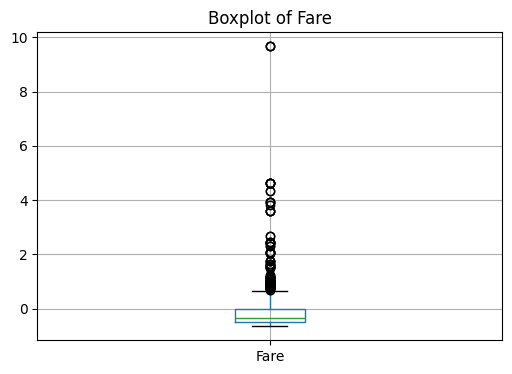


Shape before outlier removal: (891, 1726)
Shape after outlier removal: (561, 1726)

Cleaned dataset saved as 'Cleaned_Titanic_Dataset.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
print("Initial Data Shape:", df.shape)
print("\nData Types and Nulls:\n")
print(df.info())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 2. Handle missing values
# Numeric columns - fill with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# Categorical columns - fill with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nNull values after cleaning:\n", df.isnull().sum())

# 3. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Standardize numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 5. Boxplots and Outlier Removal (IQR Method)
def remove_outliers(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df_encoded.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers
df_clean = remove_outliers(df_encoded, numeric_cols)
print(f"\nShape before outlier removal: {df_encoded.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

# 6. Save the cleaned data
df_clean.to_csv("Cleaned_Titanic-Dataset.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_Titanic_Dataset.csv'")
